In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#generate four different types of variables with three different variables


In [3]:
def gen_types(type_dictionary):
    #type dictionary has distribution of types
    index = 0
    df_sim = pd.DataFrame(columns = ['Type'])
    for key, value in type_dictionary.items():
        tracker = 0
        while tracker < value:
            df_sim.loc[index] = key
            tracker += 1
            index += 1
    return df_sim

In [4]:
#slow but works
df_sim = gen_types({1:5000,2:5000,3:100,4:100})

In [5]:
df_sim

,Type
0,1
1,1
2,1
3,1
4,1
...,...
10195,4
10196,4
10197,4
10198,4


In [6]:
def gen_x(df_sim,var_name,mean_dictionary,var_dictionary):
    df_sim[var_name] = 0
    for type_id in df_sim['Type'].unique():
        subtype_rows = df_sim.loc[df_sim['Type'] == type_id].shape[0]
        data = np.random.normal(loc = mean_dictionary[type_id], scale = var_dictionary[type_id], size = subtype_rows)
        df_sim.loc[df_sim['Type'] == type_id, var_name] = data
    return df_sim

In [7]:
mean_dictionary = {1: 10, 2: -10, 3: 10, 4: -10}
var_dictionary = {1: 3, 2: 3, 3: 3, 4: 3}
df_sim = gen_x(df_sim, 'x1', mean_dictionary, var_dictionary)

In [8]:
df_sim

,Type,x1
0,1,7.444229
1,1,9.972689
2,1,8.720480
3,1,6.467515
4,1,4.761369
...,...,...
10195,4,-11.961010
10196,4,-8.187518
10197,4,-9.533967
10198,4,-7.178255


In [9]:
mean_dictionary = {1: 0, 2: 0, 3: 0, 4: 0}
var_dictionary = {1: 5, 2: 5, 3: 5, 4: 5}
df_sim = gen_x(df_sim, 'x2', mean_dictionary, var_dictionary)

In [10]:
mean_dictionary = {1: 0, 2: 0, 3: 15, 4: -15}
var_dictionary = {1: 1, 2: 1, 3: 1, 4: 1}
df_sim = gen_x(df_sim, 'x3', mean_dictionary, var_dictionary)

In [11]:
df_sim

,Type,x1,x2,x3
0,1,7.444229,-3.557355,-0.399303
1,1,9.972689,-6.835519,1.312071
2,1,8.720480,-10.539763,0.296928
3,1,6.467515,0.988632,-1.121338
4,1,4.761369,4.926415,0.017294
...,...,...,...,...
10195,4,-11.961010,-0.409333,-16.144484
10196,4,-8.187518,3.591773,-13.965866
10197,4,-9.533967,2.273263,-15.132374
10198,4,-7.178255,-1.579662,-13.410357


In [12]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'x3')

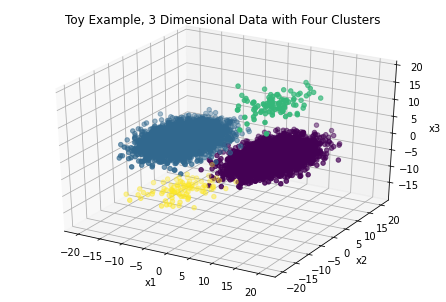

In [77]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_sim['x1'],df_sim['x2'],df_sim['x3'], c = df_sim['Type'])
plt.title('Toy Example, 3 Dimensional Data with Four Clusters')
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_zlabel('x3')

Text(0, 0.5, 'x2')

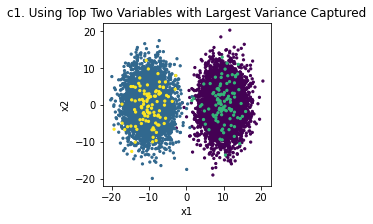

In [78]:
#### x1, x2 does not separate all 4 clusters
plt.figure(figsize = (3,3))
plt.scatter(x = df_sim['x1'],y = df_sim['x2'], c = df_sim['Type'], s = 5)
plt.title('c1. Using Top Two Variables with Largest Variance Captured')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x3')

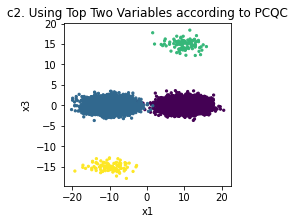

In [74]:
#x1, x3 plot does
plt.figure(figsize = (3,3))
plt.scatter(x = df_sim['x1'],y = df_sim['x3'], c = df_sim['Type'], s = 5)
plt.title('c2. Using Top Two Variables according to PCQC')
plt.xlabel('x1')
plt.ylabel('x3')

In [16]:
#plot distribution of x1,x2,x3 in a single plot.  x1**2

In [17]:
melted_sim = pd.melt(df_sim[['x1','x2','x3']])

In [18]:
melted_sim

,variable,value
0,x1,7.444229
1,x1,9.972689
2,x1,8.720480
3,x1,6.467515
4,x1,4.761369
...,...,...
30595,x3,-16.144484
30596,x3,-13.965866
30597,x3,-15.132374
30598,x3,-13.410357


In [19]:
melted_sim['value_sq'] = np.power(melted_sim['value'],2)

In [ ]:
melted_sim['value_abs'] = np.power(melted_sim['value_abs'])

In [20]:
200/10200

0.0196078431372549

In [21]:
Means = melted_sim.groupby('variable')['value_sq'].mean()
Percentile = melted_sim.groupby('variable')['value_sq'].agg(lambda x: pd.Series.quantile(x, .985))

In [22]:
Percentile

variable
x1    272.766569
x2    146.589826
x3    202.397684
Name: value_sq, dtype: float64

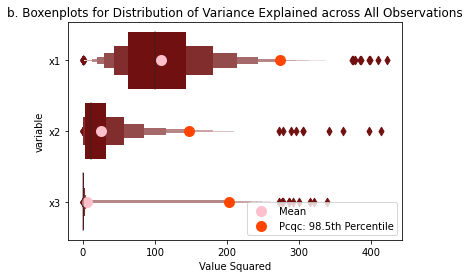

In [73]:
plt.figure(figsize = (6,4))
sns.boxenplot(x='value_sq',y='variable',data=melted_sim, color = 'maroon')
plt.setp(ax.collections, alpha=.3)
plt.scatter(y=range(len(Means)),x=Means,c="pink", label = 'Mean', marker = 'o',
           linewidths = 5)
plt.scatter(y=range(len(Percentile)),x=Percentile, label = 'Pcqc: 98.5th Percentile',
           c = 'orangered', marker = 'o', linewidths = 5)
plt.xlabel('Value Squared')
plt.title('b. Boxenplots for Distribution of Variance Explained across All Observations')
plt.legend(loc = 'lower right')

In [129]:
Means

variable
x1    108.907057
x2     24.865663
x3      5.416206
Name: value_sq, dtype: float64

In [130]:
Percentile

variable
x1    275.898501
x2    148.160981
x3    203.456839
Name: value_sq, dtype: float64